In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [8]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [27]:
#Load threshold data
M = 30
N = 10000
alg = 'threshold'
fn_in = './runs/bandit_%s_M_%d_N_%d.npz'%(alg, M, N)

a = np.load(fn_in)
regret_thr = a['regret']
arm_pulls_thr = a['arm_pulls']

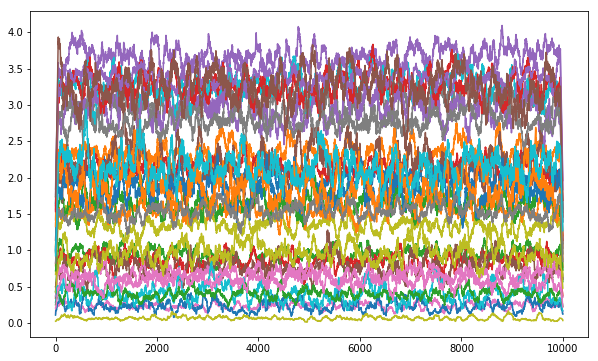

In [28]:
plt.plot(smooth(regret_thr).T)

In [26]:
#Diversity in arms pulled?
total_pulls = np.sum(arm_pulls_thr, 1)
total_pulls

array([[  1.00000000e+00,   9.99700000e+03,   1.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   9.99700000e+03,   1.00000000e+00,
          1.00000000e+00],
       [  2.00000000e+00,   1.00000000e+00,   9.99600000e+03,
          1.00000000e+00],
       [  1.00000000e+00,   9.61400000e+03,   1.00000000e+00,
          3.84000000e+02],
       [  1.00000000e+00,   1.00000000e+00,   9.99700000e+03,
          1.00000000e+00],
       [  9.99700000e+03,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   1.30000000e+01,   9.98400000e+03,
          2.00000000e+00],
       [  1.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          9.99500000e+03],
       [  9.99500000e+03,   1.00000000e+00,   2.00000000e+00,
          2.00000000e+00],
       [  9.99700000e+03,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   9.99500000e+03,   2.00000000e+00,
          2.00000000e+00],
       [  7.00000000e